In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.shape

(10000, 14)

In [7]:
df.size

140000

In [8]:
x = df.drop(['Geography', 'Gender', 'Surname','Exited'], axis = 1)
x

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52


In [9]:
y = df['Exited']

<Axes: xlabel='Exited', ylabel='count'>

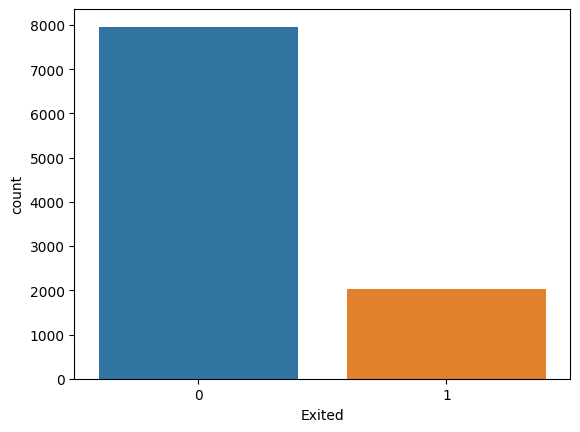

In [10]:
sns.countplot(x=y)

In [11]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
x_scale = scaler.fit_transform(x)
x_scale

array([[0.00000000e+00, 2.75616127e-01, 5.38000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 5.06734893e-01],
       [1.00010001e-04, 3.26454364e-01, 5.16000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 5.62708739e-01],
       [2.00020002e-04, 2.14421435e-01, 3.04000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 5.69654352e-01],
       ...,
       [9.99799980e-01, 7.53273144e-02, 7.18000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 2.10390092e-01],
       [9.99899990e-01, 4.66636532e-01, 8.44000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 4.64429053e-01],
       [1.00000000e+00, 2.50483021e-01, 8.84000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.90914232e-01]])

In [14]:
# Cross Validation

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale,y,test_size = 0.46,random_state=46)

In [15]:
x_train.shape

(5400, 10)

In [16]:
x_scale.shape

(10000, 10)

In [17]:
x_test.shape

(4600, 10)

In [19]:
from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter = 100, activation='relu',
                       random_state = 46)


In [22]:
neural.fit(x_train,y_train)

c:\Users\91937\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=46)

In [23]:
y_pred = neural.predict(x_test)

In [24]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

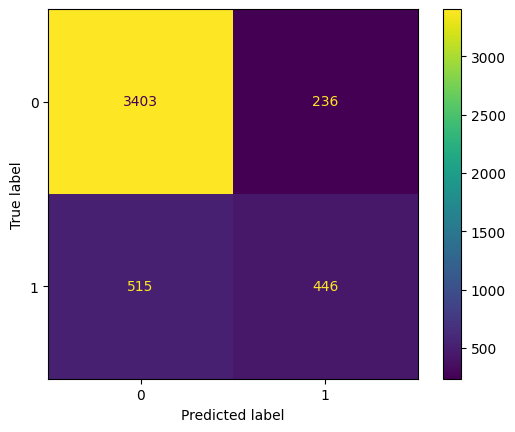

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score,classification_report
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [26]:
accuracy_score(y_test,y_pred)

0.8367391304347827

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3639
           1       0.65      0.46      0.54       961

    accuracy                           0.84      4600
   macro avg       0.76      0.70      0.72      4600
weighted avg       0.82      0.84      0.83      4600



In [29]:
!pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   --------------------------- ------------ 163.8/235.6 kB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
x_balance, y_balance = ros.fit_resample(x,y) 

<Axes: xlabel='Exited', ylabel='count'>

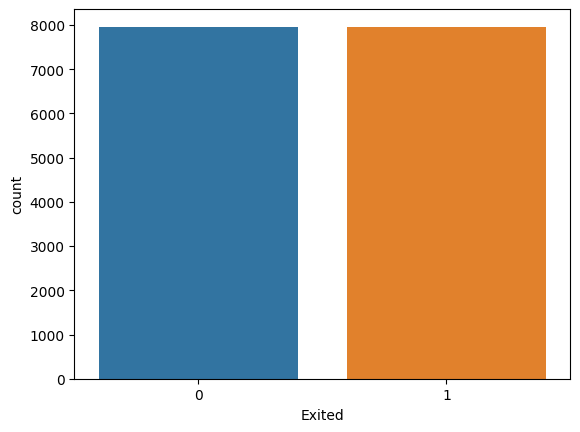

In [32]:
sns.countplot(x=y_balance)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale = scaler.fit_transform(x_balance)

In [40]:
x_scale

array([[0.00000000e+00, 2.75616127e-01, 5.38000000e-01, ...,
        1.00000000e+00, 1.00000000e+00, 5.06734893e-01],
       [1.00010001e-04, 3.26454364e-01, 5.16000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 5.62708739e-01],
       [2.00020002e-04, 2.14421435e-01, 3.04000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 5.69654352e-01],
       ...,
       [9.99799980e-01, 7.53273144e-02, 7.18000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 2.10390092e-01],
       [9.99899990e-01, 4.66636532e-01, 8.44000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 4.64429053e-01],
       [1.00000000e+00, 2.50483021e-01, 8.84000000e-01, ...,
        1.00000000e+00, 0.00000000e+00, 1.90914232e-01]])

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale, y,test_size = 0.3, random_state = 0)

In [43]:
x_train.shape

(7000, 10)

In [44]:
x_test.shape

(3000, 10)

In [45]:
x_scale.shape

(10000, 10)

In [47]:
from sklearn.neural_network import MLPClassifier
neural = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter = 100, activation = 'relu',
                       random_state = 0)


In [48]:
neural.fit(x_train, y_train)

c:\Users\91937\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [49]:
y_pred = neural.predict(x_test)

In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

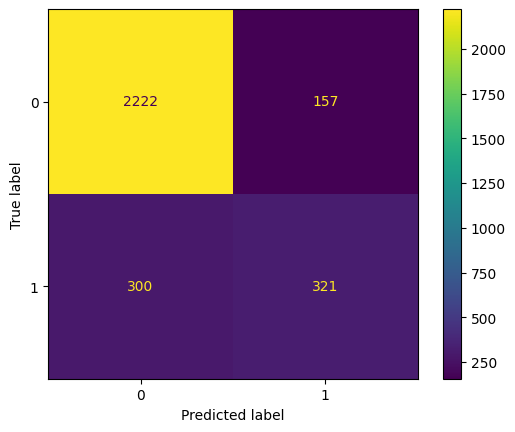

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [52]:
accuracy_score(y_test,y_pred)

0.8476666666666667

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2379
           1       0.67      0.52      0.58       621

    accuracy                           0.85      3000
   macro avg       0.78      0.73      0.75      3000
weighted avg       0.84      0.85      0.84      3000

